In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read the pre-processed data set
concatenate_df = pd.read_csv('Dataset/Concat_dataframe.csv')
concatenate_df

,HCHO reading,Location,Current Date,Next Date
0,0.000263,"Deniyaya, Matara",2019-01-01,2019-01-02
1,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02
2,0.000263,Colombo Proper,2019-01-02,2019-01-03
3,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
4,0.000006,Nuwara Eliya Proper,2019-01-02,2019-01-03
...,...,...,...,...
12774,0.000158,Kurunegala Proper,2023-12-30,2023-12-31
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31
12776,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12777,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [8]:
# seasonal variations
concatenate_df['Current Date'] = pd.to_datetime(concatenate_df['Current Date'])
concatenate_df['Next Date'] = pd.to_datetime(concatenate_df['Next Date'])

concatenate_df['Year'] = concatenate_df['Current Date'].dt.year
concatenate_df['Month'] = concatenate_df['Current Date'].dt.month
concatenate_df['Week'] = concatenate_df['Current Date'].dt.isocalendar().week

# Grouping data by year and month for seasonal analysis
seasonal_data = concatenate_df.groupby(['Year', 'Month'])['HCHO reading'].mean().reset_index()

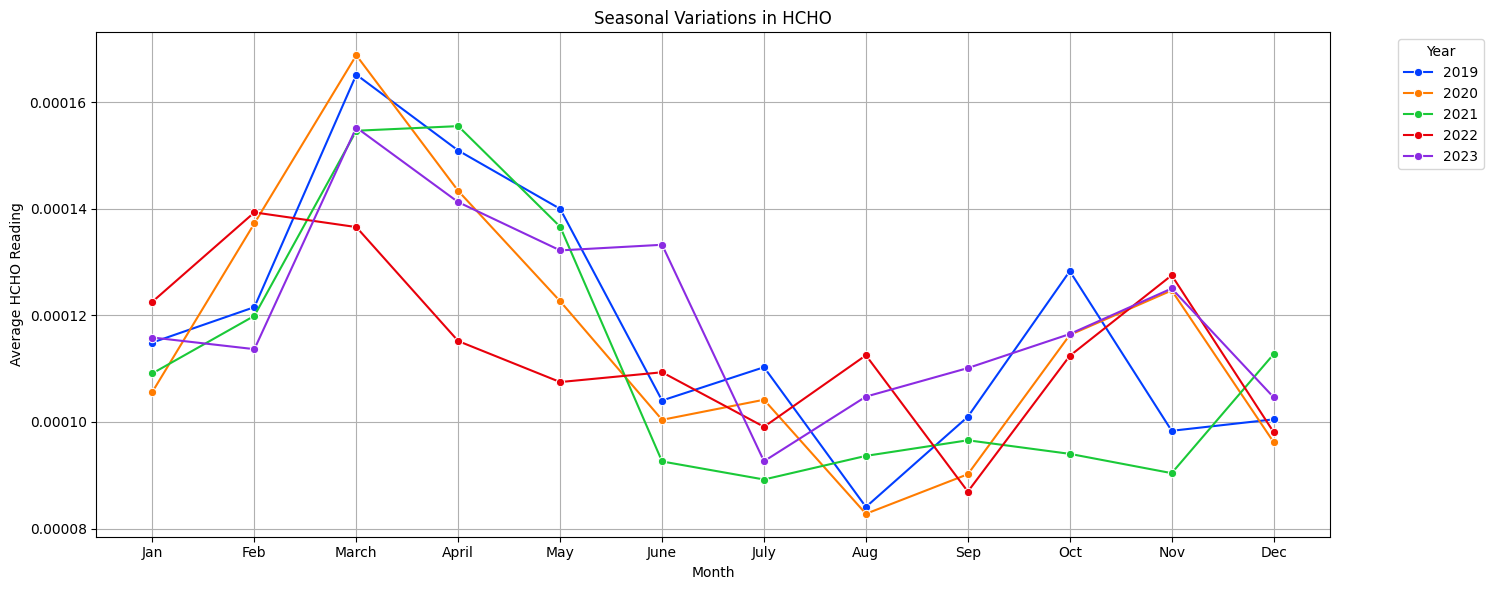

In [9]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
palette = sns.color_palette("bright")
sns.lineplot(x="Month", y="HCHO reading", hue="Year", data=seasonal_data, marker='o', palette=palette)
plt.title('Seasonal Variations in HCHO')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

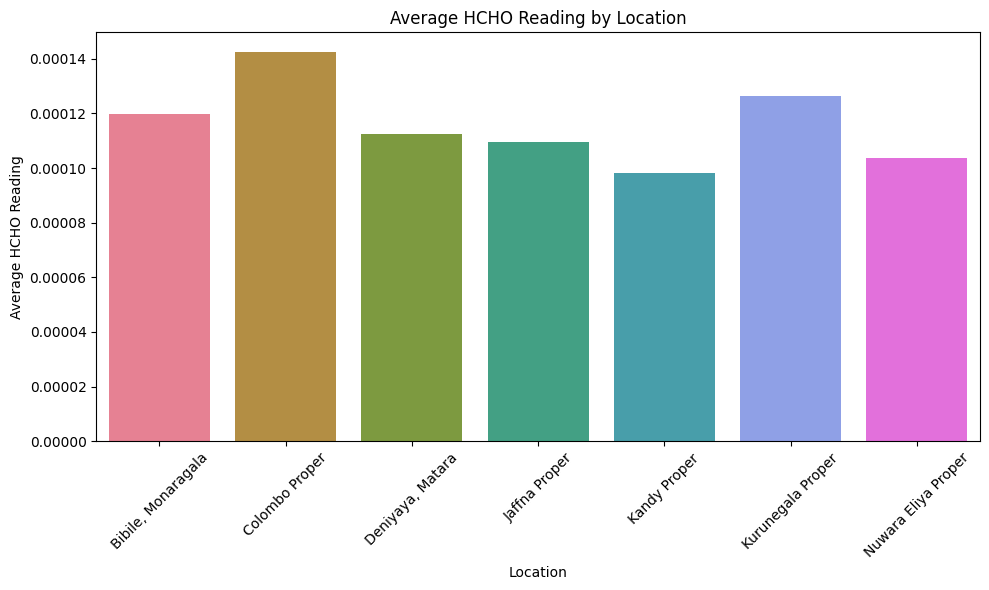

In [12]:
# Grouping data by location and aggregating HCHO readings
location_data = concatenate_df.groupby('Location')['HCHO reading'].mean().reset_index()
# Define a color palette with different colors for each city
city_palette = sns.color_palette("husl", len(location_data))

plt.figure(figsize=(10, 6))
sns.barplot(data=location_data, x='Location', y='HCHO reading', palette=city_palette)
plt.title('Average HCHO Reading by Location')
plt.xlabel('Location')
plt.ylabel('Average HCHO Reading')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


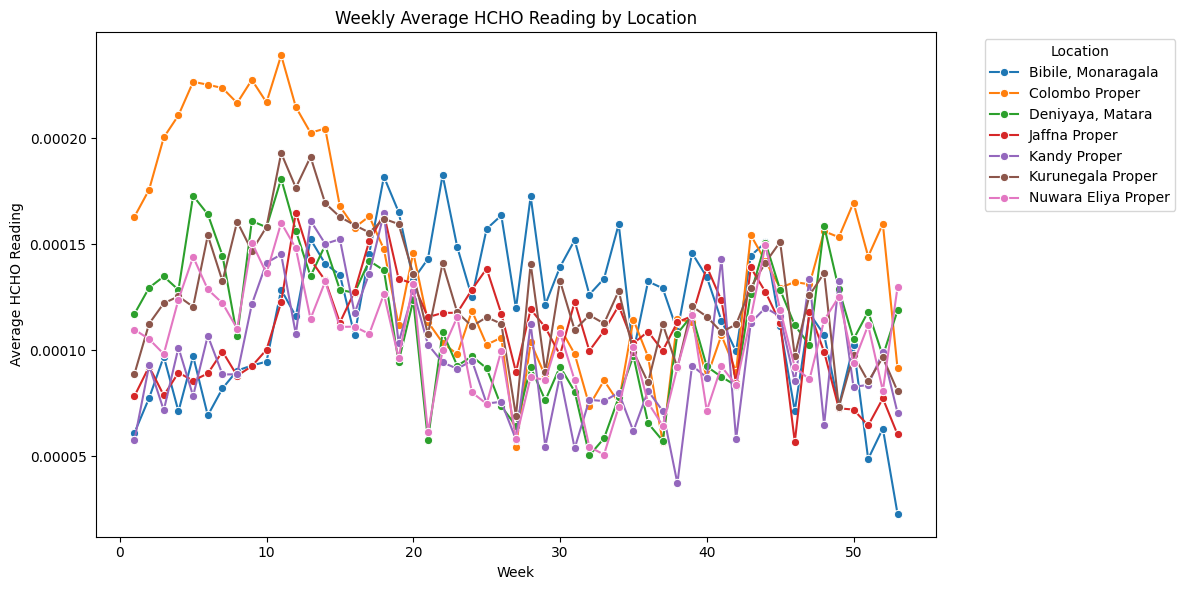

In [18]:
# Grouping data by location and week and aggregating HCHO readings
weekly_location_data = concatenate_df.groupby(['Location', 'Week'])['HCHO reading'].mean().reset_index()

# Plotting the aggregated data of different cities on a weekly basis
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_location_data, x='Week', y='HCHO reading', hue='Location', marker='o')
plt.title('Weekly Average HCHO Reading by Location')
plt.xlabel('Week')
plt.ylabel('Average HCHO Reading')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()